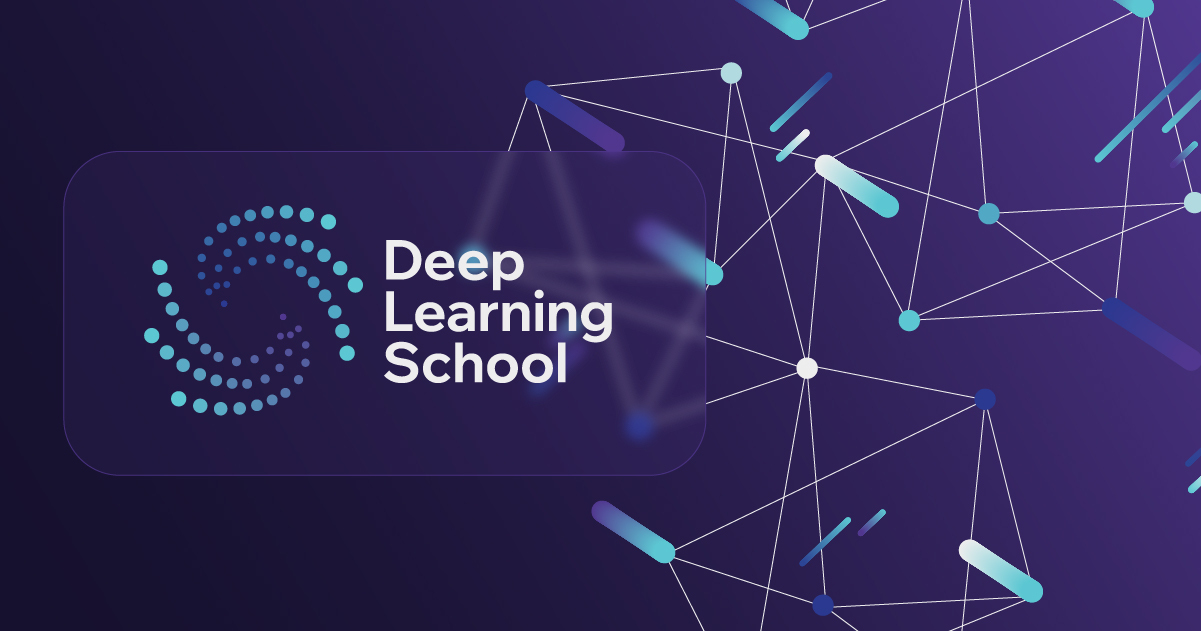

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

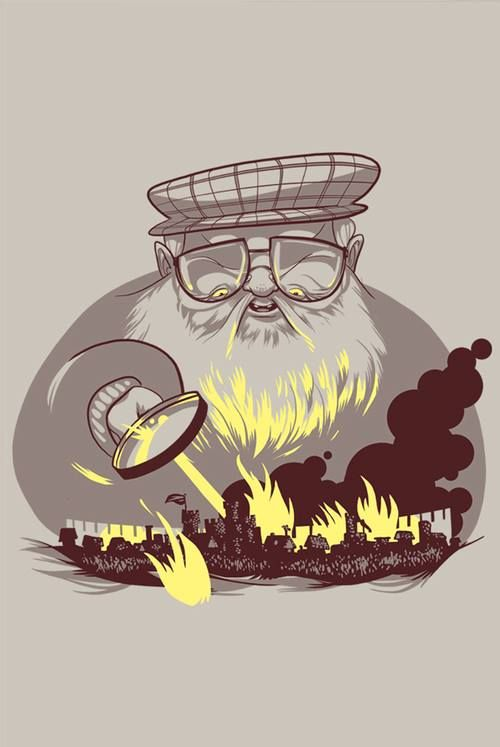

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [322]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 69.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 76.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [324]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col = "S.No")

Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [325]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [326]:
data.describe(include = ['number']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [327]:
data.shape[0]

1557

Процент пустых значений:

In [328]:
per_na = data.isna().sum() / data.shape[0] * 100
per_na

,0
name,0.000000
title,53.949904
male,0.000000
culture,68.657675
dateOfBirth,82.080925
mother,98.843931
father,98.587026
heir,98.651252
house,24.470135
spouse,87.154785


Text(0.5, 1.0, 'Процент пустых значений в колонках')

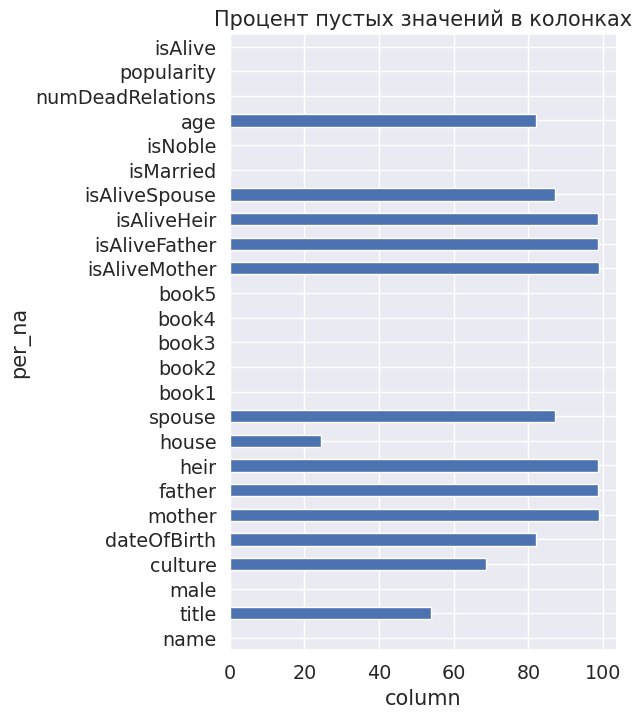

In [329]:
plt.figure(figsize=(5, 8))
per_na.plot(kind='barh')
plt.xlabel('column')
plt.ylabel('per_na')
plt.title('Процент пустых значений в колонках')

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

Text(0.5, 1.0, 'Гистограмма признака "popularity". Общая выборка - 1557 персонажей')

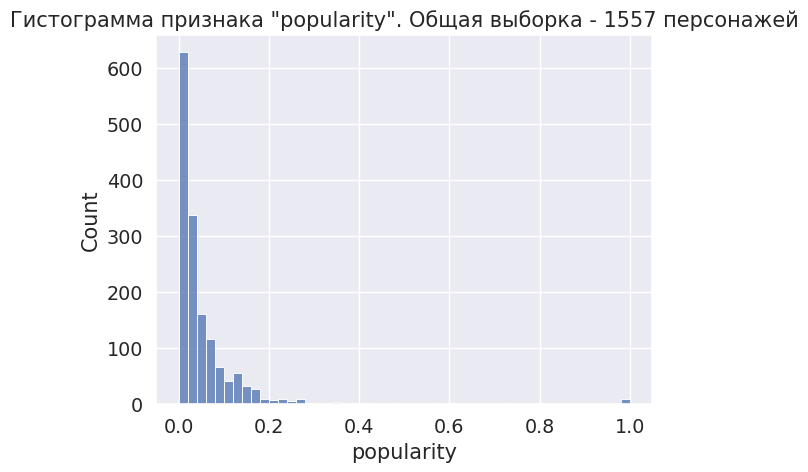

In [330]:
sns.histplot(data['popularity'], bins = 50)
plt.title(f'Гистограмма признака "popularity". Общая выборка - {data['popularity'].notna().sum()} персонажей')

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


Text(0.5, 1.0, 'Гистограмма признака "popularity". Общая выборка - 1557 персонажей')

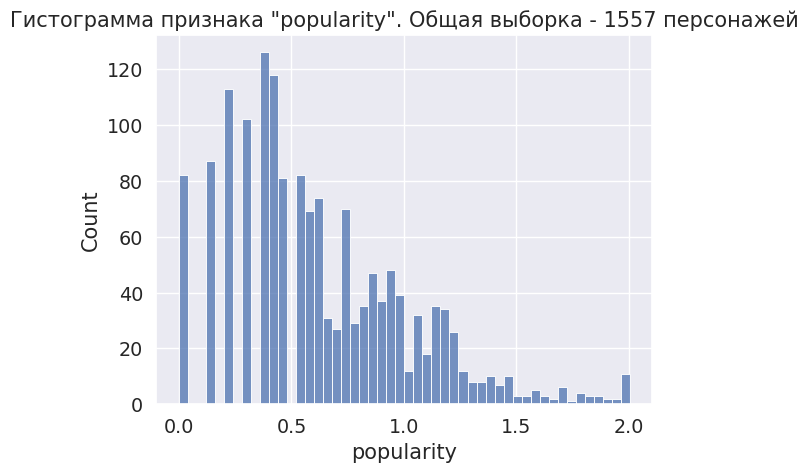

In [331]:
M = 100
sns.histplot(np.log10(data["popularity"]*M+1), bins = 50)
plt.title(f'Гистограмма признака "popularity". Общая выборка - {data['popularity'].notna().sum()} персонажей')

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

Text(0.5, 1.0, 'Гистограмма признака "numDeadRelations". Общая выборка: 69')

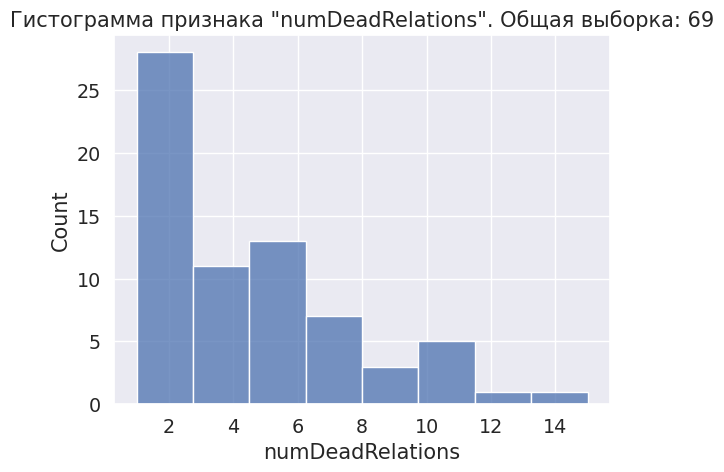

In [332]:
a = data.numDeadRelations[data.numDeadRelations > 0]
sns.histplot(a)
plt.title(f'Гистограмма признака "numDeadRelations". Общая выборка: {a.shape[0]}')

Text(0.5, 1.0, 'Гистограмма признака "boolDeadRelations". Общая выборка: 1557')

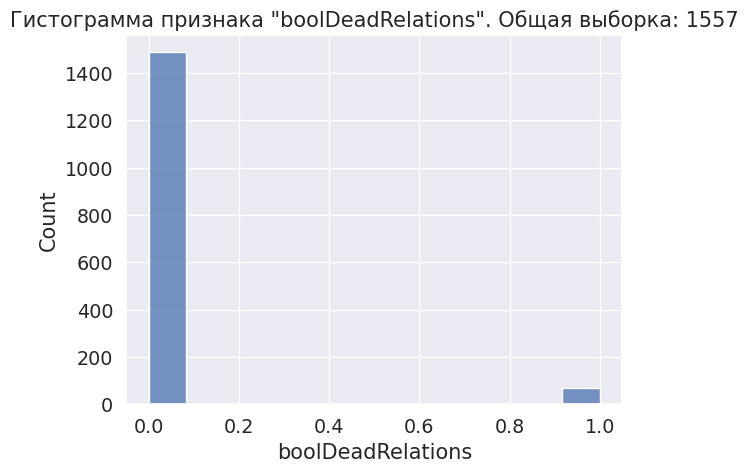

In [333]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
sns.histplot(data['boolDeadRelations'].T)
plt.title(f'Гистограмма признака "boolDeadRelations". Общая выборка: {data['boolDeadRelations'].shape[0]}')

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [334]:
data['age_value'] = [x if not np.isnan(x) else 0 for x in data['age']]
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

**Проверка заполненных значений:**

In [335]:
print(data['age_value'].eq(0).sum(), data['age_value'].ne(0).sum())
print(data['age_no_data'].eq(0).sum(), data['age_no_data'].ne(0).sum())

1280 277
279 1278


**Ещё один способ:**

In [336]:
data['age_value'] = data['age'].fillna(0)
data['age_no_data'] = data['age'].isna().astype(int)
print(data['age_value'].eq(0).sum(), data['age_value'].ne(0).sum())
print(data['age_no_data'].eq(0).sum(), data['age_no_data'].ne(0).sum())

1280 277
279 1278


**По всей видимости у некотрых персонажей возраст изначанльно был 0 лет. В любом лслучае различия небольшие**

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [337]:
data['culture'].value_counts(dropna=False)

,count
culture,
NaN,1069
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


**10 самых популярных:**

<Axes: ylabel='culture'>

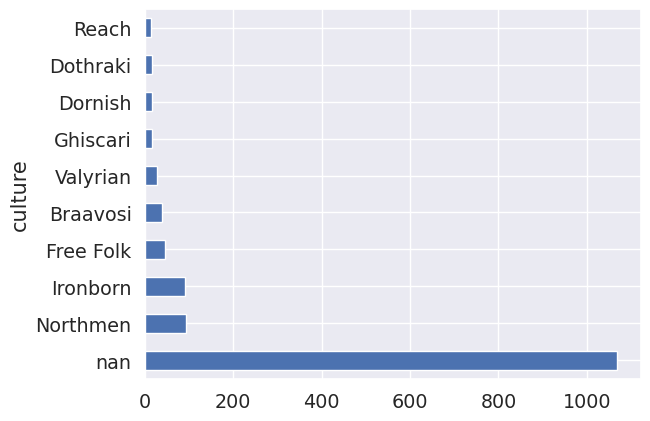

In [338]:
data['culture'].value_counts(dropna=False).head(10).plot(kind='barh')

Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [339]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [340]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [341]:
# По аналогии с примером выше инвертируйте словарь cultures_grouped
cultures_grouped_inverted = {}
for key in cultures_grouped.keys():
  for val in cultures_grouped[key]:
    cultures_grouped_inverted.update({val:key})
print(cultures_grouped_inverted)

{'valyrian': 'Old Nations', 'first men': 'Old Nations', 'andal': 'Old Nations', 'andals': 'Old Nations', 'rhoynar': 'Old Nations', 'northmen': 'the North', 'northern mountain clans': 'the North', 'crannogmen': 'the North', 'ironborn': 'the Iron Islands', 'ironmen': 'the Iron Islands', 'valemen': 'the Mountain and the Vale', 'vale': 'the Mountain and the Vale', 'vale mountain clans': 'the Mountain and the Vale', 'sistermen': 'the Mountain and the Vale', 'riverlands': 'the Isles and Rivers', 'rivermen': 'the Isles and Rivers', 'westerman': 'the Rock', 'westermen': 'the Rock', 'westerlands': 'the Rock', 'stormlander': 'the Stormlands', 'stormlands': 'the Stormlands', 'reach': 'the Reach', 'reachmen': 'the Reach', 'the reach': 'the Reach', 'dornish': 'Dorne', 'dornishmen': 'Dorne', 'dorne': 'Dorne', 'astapor': 'Essos Nations', 'astapori': 'Essos Nations', 'braavosi': 'Essos Nations', 'braavos': 'Essos Nations', 'tyroshi': 'Essos Nations', 'lysene': 'Essos Nations', 'lyseni': 'Essos Nations

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [342]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [343]:
print(f'Количество пропусков "culture_grouped": {data['culture_grouped'].isna().sum()}')
print(f'Количество значений culture_no_data в "culture_grouped": {data['culture_grouped'].eq('culture_no_data').sum()}')

Количество пропусков "culture_grouped": 1069
Количество значений culture_no_data в "culture_grouped": 0


In [344]:
data['culture_grouped'].fillna('culture_no_data', inplace=True)

/tmp/ipython-input-223294471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['culture_grouped'].fillna('culture_no_data', inplace=True)


In [345]:
print(f'Количество пропусков "culture_grouped": {data['culture_grouped'].isna().sum()}')
print(f'Количество значений culture_no_data в "culture_grouped": {data['culture_grouped'].eq('culture_no_data').sum()}')

Количество пропусков "culture_grouped": 0
Количество значений culture_no_data в "culture_grouped": 1069


<Axes: xlabel='count', ylabel='culture_grouped'>

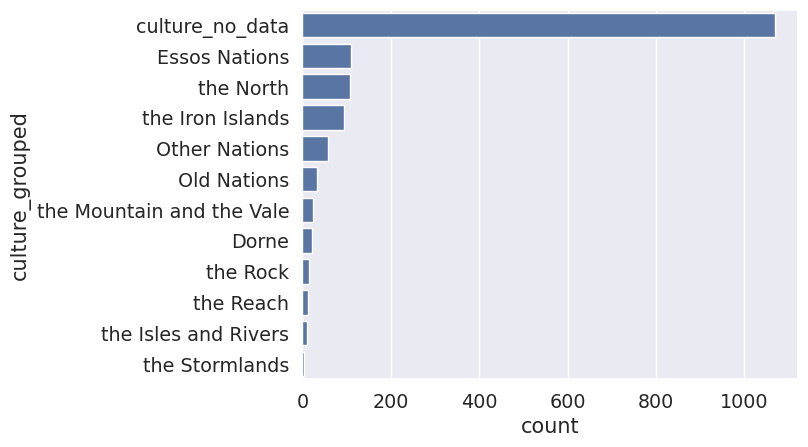

In [346]:
sns.barplot(data['culture_grouped'].value_counts(), orient='h')

In [347]:
data['culture_grouped'].value_counts()

,count
culture_grouped,
culture_no_data,1069
Essos Nations,109
the North,108
the Iron Islands,95
Other Nations,57
Old Nations,32
the Mountain and the Vale,25
Dorne,21
the Rock,14


Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

**Я не знаю лора вселенной поэтому решил никак не группировать их более**

---

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [348]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
name,1557
title,195
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,315
spouse,186


In [349]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = ["number"]).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique(dropna=False))

,count,min,max,N_unique_values
male,1557.0,0.0,1.0,2
dateOfBirth,279.0,-25.0,299.0,106
book1,1557.0,0.0,1.0,2
book2,1557.0,0.0,1.0,2
book3,1557.0,0.0,1.0,2
book4,1557.0,0.0,1.0,2
book5,1557.0,0.0,1.0,2
isAliveMother,18.0,0.0,1.0,3
isAliveFather,22.0,0.0,1.0,3
isAliveHeir,21.0,0.0,1.0,3


In [350]:
# Вывел чтобы не листать всё время вверх
data.describe(include = ["object"]).T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6
culture_grouped,1557,12,culture_no_data,1069


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [351]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()

,isAlive
isAliveSpouse,
0.0,0.619048
1.0,0.753165
NaN,0.786293


In [352]:
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveSpouse,,
0.0,0.619048,42
1.0,0.753165,158
NaN,0.786293,1357


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

**Сначала доработаем признак "dateOfBirth" по аналогии с возрастом:**

In [353]:
data["dateOfBirth_value"] = data["dateOfBirth"].fillna(0)
print(data['dateOfBirth_value'].eq(0).sum(), data['dateOfBirth_value'].ne(0).sum())
print(data['age_no_data'].eq(0).sum(), data['age_no_data'].ne(0).sum())

1278 279
279 1278


**Удалим признаки "age" и "dateOfBirth", т.к. заменили их на "age_value", "age_no_data" и "dateOfBirth_value"**

In [354]:
data.drop(columns=["age", "dateOfBirth"], inplace=True)

**Теперь уже займёмся категириальными признаками**

**Есть ли родители и наследник:**

In [355]:
# Создадим новые признаки, говорящие о наличие Матери, Отца или Наследника.
# Причём Мать и Отца объединим в один призак:
data["BoolParents"] = (~(data.mother.isna() & data.father.isna())).astype(int)
data["BoolHeir"] = (~(data["heir"].isna())).astype(int)


# Удалим признаки: "isAliveMother", "isAliveFather" и "isAliveHeir"
data.drop(columns=["isAliveMother", "isAliveFather", "isAliveHeir"], inplace=True)

# Аналогично и признаки "mother", "father" и "heir"
data.drop(columns=["mother", "father", "heir"], inplace=True)

**Есть супруг или нет:**

In [356]:
# Пропуски в признаке "isAliveSpouse" (жив супруг или нет) могут говорить о том есть ли супруг в принципе
# (если он есть, но не указан, то значит он не значим, что тоже определённая информация)

# Создадим отельный призак есть супург или нет: BoolSpouse
data["BoolSpouse"] = (~data["isAliveSpouse"].isna()).astype(int)

# Заполним пропсуки в признаке "isAliveSpouse"
data["isAliveSpouse"] = data["isAliveSpouse"].fillna(0)

# Удалим признак "spouse" (имя супруга) потому что их слишком много и
# вместо этого мы создали новый признак выше

data.drop(columns=["spouse"], inplace=True)

**Титул:**

In [357]:
# Посмотрим на самые часто встречающиеся титулы
data["title"].value_counts().head(20)

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9
Septa,9


In [358]:
# Честно говоря, разбираться в этом и группировать лень (не знаю лора вселенной),
# поэтому оставим самый часто встречающийся "Ser", добавим "Other_titles" и "No_Titles"

data["title"] = data["title"].apply(lambda x: x if x == "Ser" else "Other_titles" if pd.notna(x) else "No_Titles")
data["title"].value_counts(dropna=False)

,count
title,
No_Titles,840
Other_titles,411
Ser,306


**Дом:**

In [359]:
data.house.value_counts(dropna=False).head(20)

,count
house,
NaN,381
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30
House Osgrey,20


In [360]:
# Заполним пропуски указав "No_House"
data.house = data.house.fillna("No_House")
top_10_houses = data.house.value_counts(dropna=False).head(10).index

In [361]:
# Оставим 10 самых часто встречающихся и добавим "Other_Houese"

data["house"] = data["house"].apply(lambda x: x if x in top_10_houses else "Other_Houese")
data.house.value_counts(dropna=False).head(20)

,count
house,
Other_Houese,769
No_House,381
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30


**Удалим name ибо вычленять из него что-то значимое слишком долго, а также culture, потому что его мы уже сгруппировали**

In [362]:
data.drop(columns=["name", "culture"], inplace=True)

**Посмотрм ещё раз на признаки:**

In [363]:
data.describe(include = ["object"]).T

,count,unique,top,freq
title,1557,3,No_Titles,840
house,1557,11,Other_Houese,769
culture_grouped,1557,12,culture_no_data,1069


In [364]:
data.describe(include = ["number"]).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique(dropna=False))

,count,min,max,N_unique_values
male,1557.0,0.0,1.0,2
book1,1557.0,0.0,1.0,2
book2,1557.0,0.0,1.0,2
book3,1557.0,0.0,1.0,2
book4,1557.0,0.0,1.0,2
book5,1557.0,0.0,1.0,2
isAliveSpouse,1557.0,0.0,1.0,2
isMarried,1557.0,0.0,1.0,2
isNoble,1557.0,0.0,1.0,2
numDeadRelations,1557.0,0.0,15.0,14


**Теперь приведём все категориальные к числовым через one-hot-encoding**

In [365]:
# Все столбцы типа object:

unprocessed_cat_features = data.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'house', 'culture_grouped']

In [366]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

In [367]:
# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([data, one_hot_data], axis=1)

# Drop the original categorical columns
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
data_encoded

,male,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,numDeadRelations,...,culture_grouped_Old Nations,culture_grouped_Other Nations,culture_grouped_culture_no_data,culture_grouped_the Iron Islands,culture_grouped_the Isles and Rivers,culture_grouped_the Mountain and the Vale,culture_grouped_the North,culture_grouped_the Reach,culture_grouped_the Rock,culture_grouped_the Stormlands
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0.0,0,0,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,1.0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0.0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0.0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,1.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0.0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,1,1,0,0,0,0.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,0,1,1,1,1,0.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


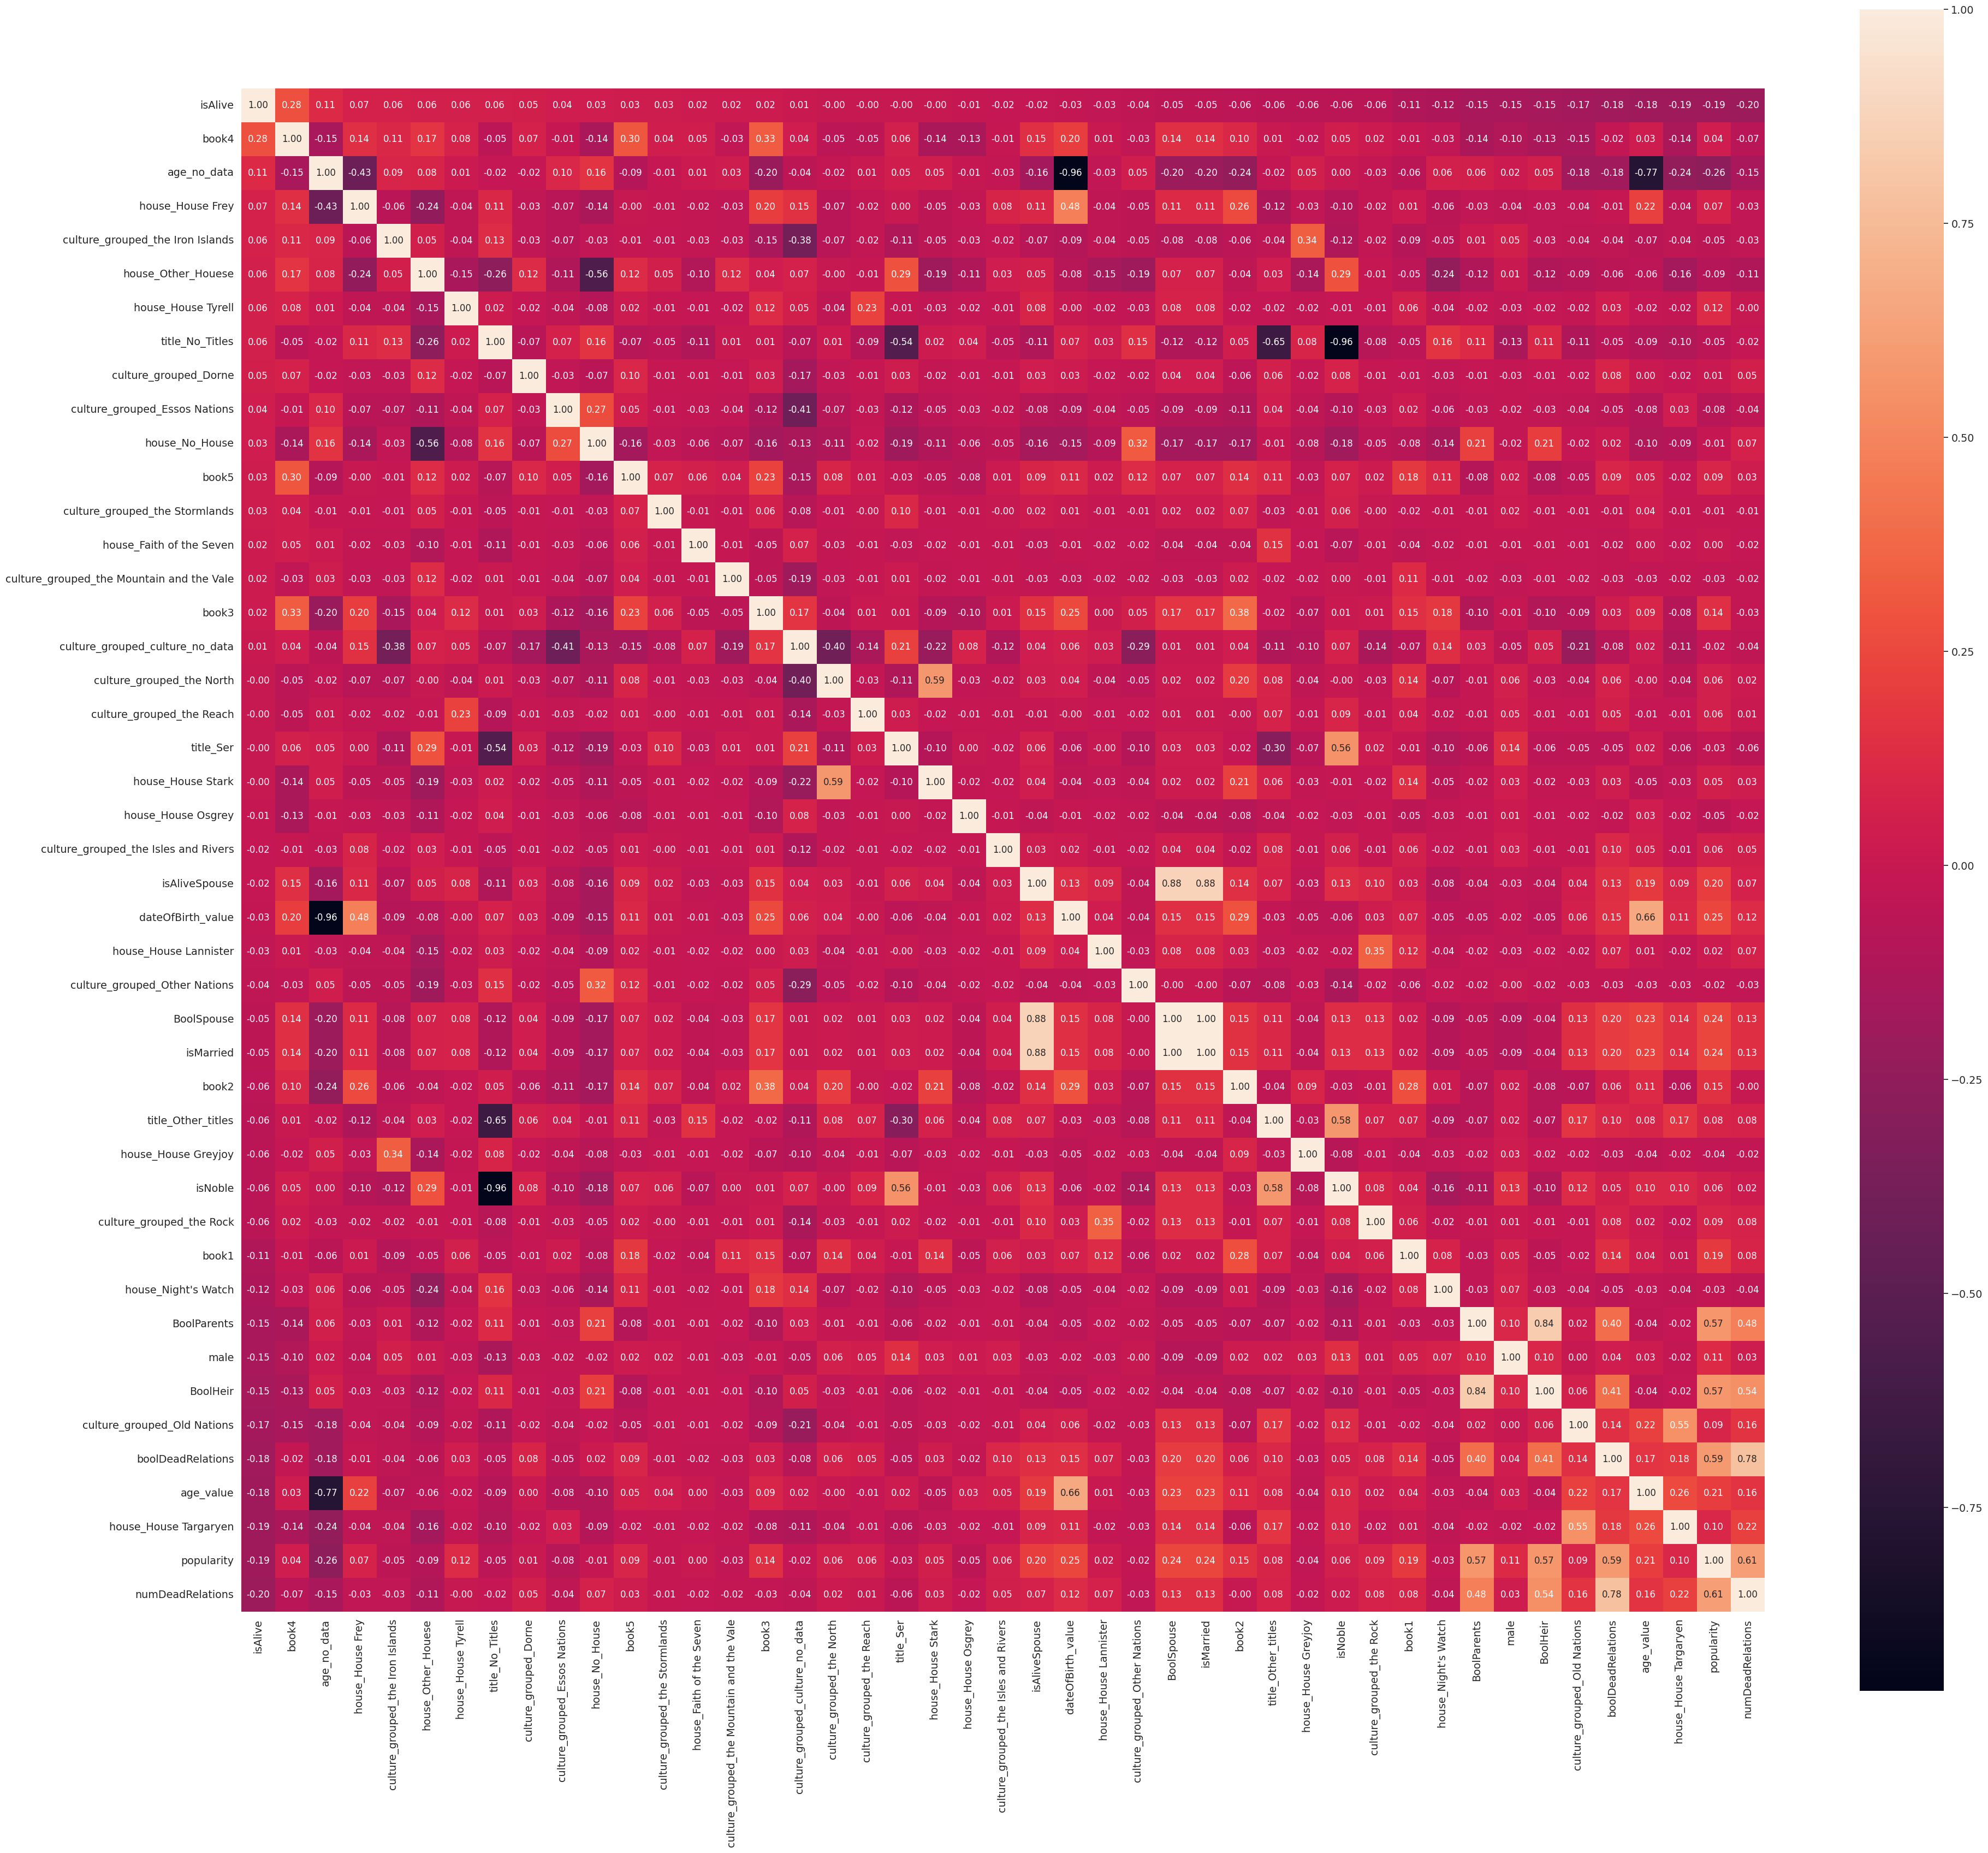

In [368]:
corrmat = data_encoded.corr()
plt.subplots(figsize=(45, 40))

# correlation matrix
k = 45 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_encoded[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [369]:
# Все признаки, которые имеют значение корреляции с другим признаком по модулю более 0.75
# Их мы удалим
del_features = ["dateOfBirth_value", "BoolSpouse", "isMarried", "isNoble", "BoolHeir", "age_value", "numDeadRelations"]

# Удаление:
data_encoded.drop(columns=del_features, inplace=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [370]:
# Удалим признаки имеющие минимальную корреляцию с целевой переменной (менее 0.01 по модулю)
del_features = ["culture_grouped_the North", "culture_grouped_the Reach", "title_Ser", "house_House Stark"]

# На всякий случай проверим это
# Считаем средние значения целевой переменной по признакам
for feature in del_features:
  print(data_encoded.groupby(feature, dropna = False)['isAlive'].mean())

print("-----------------------------------------------------------------------")
for feature in del_features:
  print(pd.pivot_table(data = data_encoded, values = 'isAlive', index = feature, aggfunc=['mean', 'count'], dropna=False))

# Удаление:
data_encoded.drop(columns=del_features, inplace=True)

culture_grouped_the North
0.0    0.778468
1.0    0.777778
Name: isAlive, dtype: float64
culture_grouped_the Reach
0.0    0.778497
1.0    0.769231
Name: isAlive, dtype: float64
title_Ser
0.0    0.779376
1.0    0.774510
Name: isAlive, dtype: float64
house_House Stark
0.0    0.778814
1.0    0.767857
Name: isAlive, dtype: float64
-----------------------------------------------------------------------
                               mean   count
                            isAlive isAlive
culture_grouped_the North                  
0.0                        0.778468    1449
1.0                        0.777778     108
                               mean   count
                            isAlive isAlive
culture_grouped_the Reach                  
0.0                        0.778497    1544
1.0                        0.769231      13
               mean   count
            isAlive isAlive
title_Ser                  
0.0        0.779376    1251
1.0        0.774510     306
                    

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [371]:
X = data_encoded.drop(["isAlive"], axis=1)
y = data_encoded["isAlive"]

In [372]:
y.describe()

,isAlive
count,1557.000000
mean,0.778420
std,0.415443
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [373]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
male,1557.0,0.590880,0.491829,0.0,0.000000,1.000000,1.000000,1.0
book1,1557.0,0.138728,0.345774,0.0,0.000000,0.000000,0.000000,1.0
book2,1557.0,0.327553,0.469472,0.0,0.000000,0.000000,1.000000,1.0
book3,1557.0,0.431599,0.495458,0.0,0.000000,0.000000,1.000000,1.0
book4,1557.0,0.562620,0.496223,0.0,0.000000,1.000000,1.000000,1.0
book5,1557.0,0.330122,0.470408,0.0,0.000000,0.000000,1.000000,1.0
isAliveSpouse,1557.0,0.101477,0.302057,0.0,0.000000,0.000000,0.000000,1.0
popularity,1557.0,0.062400,0.121416,0.0,0.013378,0.023411,0.063545,1.0
boolDeadRelations,1557.0,0.044316,0.205862,0.0,0.000000,0.000000,0.000000,1.0
age_no_data,1557.0,0.820809,0.383635,0.0,1.000000,1.000000,1.000000,1.0


**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

# Не забываем обязательно указывать: shuffle=True

**Масштабирование данных**

In [376]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [377]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [378]:
# Шаг 1. создание модели
model = LogisticRegression(random_state=44, max_iter=1000)

# Шаг 2. обучение модели
model.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_val_scaled)

**Обучение всех остальных моделей разом бдет ниже**

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [379]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [380]:
# Шаг 3. Предсказание на тестовых данных

y_pred = model.predict(X_val_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


In [381]:
print(f"Результат на тренировочных данных: {accuracy_score(y_train, model.predict(X_train_scaled))}")

Результат на тренировочных данных: 0.8168674698795181


**Обучение и оценка всех моделей:**

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    "LogReg": LogisticRegression(random_state=44, max_iter=1000),
    "RF": RandomForestClassifier(random_state=44),
    "AdaBoost": AdaBoostClassifier(random_state=44),
    "GPC": GaussianProcessClassifier(random_state=44),
    "GNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Tree": DecisionTreeClassifier(random_state=44),
}

scores = {}
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_val_scaled)
    scores[name] = accuracy_score(y_val, y_pred)

print(scores)
best = max(scores, key=scores.get)
print("Лучшая модель:", best, "Accuracy =", scores[best])

{'LogReg': 0.8141025641025641, 'RF': 0.8269230769230769, 'AdaBoost': 0.8141025641025641, 'GPC': 0.8012820512820513, 'GNB': 0.375, 'KNN': 0.7788461538461539, 'SVC': 0.8269230769230769, 'Tree': 0.7916666666666666}
Лучшая модель: RF Accuracy = 0.8269230769230769


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [383]:
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [384]:
#Подсказка
data_test.loc[data_test['age']<0].T # Находим данные с ошибками в дате рождения и возрасте

S.No,1685,1869
name,Doreah,Rhaego
title,NaN,NaN
male,0,0
culture,Lysene,NaN
dateOfBirth,278279.0,298299.0
mother,NaN,NaN
father,NaN,NaN
heir,NaN,NaN
house,House Targaryen,House Targaryen
spouse,NaN,NaN


In [385]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
data_test.loc[1869, 'dateOfBirth'] = 299.
data_test.loc[1685, 'age'] = 0.
data_test.loc[1869, 'age'] = 0.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

**Быстрая проверка данных на адекватность:**

In [386]:
data_test.describe(include='number').T[['max', 'min', 'count']]

,max,min,count
male,1.0,0.0,389.0
dateOfBirth,300.0,-28.0,154.0
book1,1.0,0.0,389.0
book2,1.0,0.0,389.0
book3,1.0,0.0,389.0
book4,1.0,0.0,389.0
book5,1.0,0.0,389.0
isAliveMother,1.0,1.0,3.0
isAliveFather,0.0,0.0,4.0
isAliveHeir,1.0,0.0,2.0


Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

**Преобразование тестового датасета по старому пайплайну:**

In [387]:
# признак по числу погибших родственников
data_test["boolDeadRelations"] = (data_test["numDeadRelations"] > 0).astype(int)

# culture - culture_grouped
data_test["culture_grouped"] = data_test["culture"].str.lower().map(cultures_grouped_inverted)
data_test["culture_grouped"].fillna("culture_no_data", inplace=True)

# title
data_test["title"] = data_test["title"].apply(lambda x: x if x == "Ser" else "Other_titles" if pd.notna(x) else "No_Titles")

# house
data_test["house"] = data_test["house"].fillna("No_House")
data_test["house"] = data_test["house"].apply(lambda x: x if x in top_10_houses else "Other_Houese")

# возраст и дата рождения
data_test["age_value"] = data_test["age"].fillna(0)
data_test["age_no_data"] = data_test["age"].isna().astype(int)
data_test["dateOfBirth_value"] = data_test["dateOfBirth"].fillna(0)
data_test.drop(columns=["age", "dateOfBirth"], inplace=True)

# признаки по родственникам и супругу + удаления как в ноутбуке
data_test["BoolParents"] = (~(data_test.mother.isna() & data_test.father.isna())).astype(int)
data_test["BoolHeir"] = (~data_test["heir"].isna()).astype(int)
data_test.drop(columns=["isAliveMother", "isAliveFather", "isAliveHeir"], inplace=True)
data_test.drop(columns=["mother", "father", "heir"], inplace=True)

data_test["BoolSpouse"] = (~data_test["isAliveSpouse"].isna()).astype(int)
data_test["isAliveSpouse"] = data_test["isAliveSpouse"].fillna(0)
data_test.drop(columns=["spouse"], inplace=True)

# удалить name и culture
data_test.drop(columns=["name", "culture"], inplace=True)


#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data_test[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_test = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data_test.index)

data_test_encoded = pd.concat([data_test, one_hot_test], axis=1)
data_test_encoded = data_test_encoded.drop(unprocessed_cat_features, axis=1)

# финальные признаки, что и в обучающей выборке
X_test = data_test_encoded[X.columns]

/tmp/ipython-input-3685916650.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test["culture_grouped"].fillna("culture_no_data", inplace=True)


**Проверяем что колонки точно те:**

In [388]:
set(X_test.columns) == set(X.columns)

True

**Масштабирование данных:**

In [389]:
# Масштабирование данных:
# scaler сохраняем ещё с тренировочной части
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


**Прогноз:**

In [390]:
# Берём лучшую модель из словаря со всеми моделями:
best_model = models[best]
best_model

RandomForestClassifier(random_state=44)

In [391]:
# Ещё раз результаты предсказаний на тренировочной:
y_pred = best_model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.8269230769230769

In [392]:
# Результаты на тестовой:
y_pred_test = best_model.predict(X_test_scaled)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [393]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.21MB/s]


In [394]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [395]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [396]:
submission["isAlive"] = y_pred_test

In [397]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,0
1944,1


In [398]:
print(f"Среднее значение целевой переменной y_train: {y_train.mean()}")
print(f"Среднее значение целевой переменной y_val: {y_val.mean()}")
print(f"Среднее значение целевой переменной y_pred_test: {y_pred_test.mean()}")

Среднее значение целевой переменной y_train: 0.7783132530120482
Среднее значение целевой переменной y_val: 0.7788461538461539
Среднее значение целевой переменной y_pred_test: 0.7223650385604113


Как сохранить измененный Pandas DataFrame в csv файл:

In [399]:
submission.to_csv("/content/new_submission.csv", index=False)